 Dataset loaded successfully!


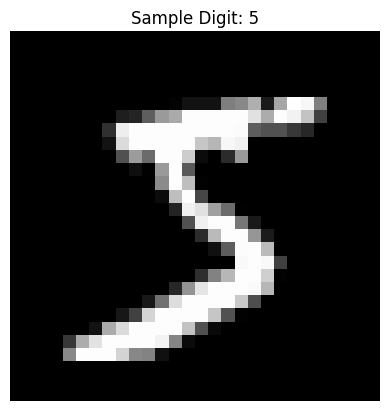


 Training started...

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9234 - loss: 0.2624 - val_accuracy: 0.9580 - val_loss: 0.1295
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9660 - loss: 0.1128 - val_accuracy: 0.9753 - val_loss: 0.0827
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9754 - loss: 0.0781 - val_accuracy: 0.9732 - val_loss: 0.0833
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9807 - loss: 0.0610 - val_accuracy: 0.9772 - val_loss: 0.0857
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9856 - loss: 0.0452 - val_accuracy: 0.9738 - val_loss: 0.1010

 Training completed successfully!

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9706 - loss: 0.0972



 Test Accuracy: 97.06%
 Test Loss: 0.0972

 Model saved as 'mnist_digit_recognizer.h5'


In [2]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


#  Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(" Dataset loaded successfully!")

#  Normalize Images (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

#  Visualize One Sample
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Sample Digit: {y_train[0]}")
plt.axis('off')
plt.show()

#  Build Neural Network Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

#  Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#  Train the Model
print("\n Training started...\n")
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)
print("\n Training completed successfully!\n")

#  Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {test_acc * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}\n")

#  Save the Model
model.save("mnist_digit_recognizer.h5")
print(" Model saved as 'mnist_digit_recognizer.h5'")
